# User Churn Analysis
## MSIS 2802 - Data Science Analysis with Python
## Final Project 
## Submitted by: Yuhao Wang

<b>Churn rate</b> (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.(wikipeida)<br />
# Project description:
Tools: Python, SVM, KNN, Logistic Regression, Random Forest, Gradient Boosting Classifier, Regularization
<ul><li>Developed algorithms for telecommunication industry to predict customer churn probability by utilizing Python. </li>
<li>Preprocessed data set by data cleaning, categorical feature transformation, standardization and feature correlation.</li>
<li>Trained supervised machine learning models including Support Vector Machine, K-Nearest Neighbors, Gradient Boosting Classifier, Logistic Regression, Random Forest and Artifical Neural Network, and implemented regularization with optimal parameters to overcome overfitting.</li>
<li>Evaluated classification models via k-fold cross-validation and confusion matrix.</li>
<li>Analyzed important features to determine top factors that influenced the result.</li>
<li>Defined calibration method to check whether the predicted value is close to real value.</li></ul>

# Motivation:

A good data science project should generate the real value. User churn analysis is a good start to change research traing into business value. As a software engineer, machine learning can instruct me to adjust product's feature and improve the users' satisfaction.

# Dataset:
I find the data from IBM Watson Analytics(https://www.ibm.com/communities/analytics/watson-analytics/resources/). The data is straightforward. Each row represents a subscribing telephone customer<br />

### Data Dictionary
<ul>
<li>customerID: useless column for this analysis, I would skip it on my analysis</li>
<li>gender:Female, Male</li>
<li>SeniorCitizen: 0-No, 1-Yes</li>
<li>Partner:Yes, No</li>
<li>Dependents:Yes, No</li>
<li>tenure:the years as user, range in [0, 72]</li>
<li>PhoneService: Yes, No</li>
<li>MultipleLines: Yes, No, No phone service</li>
<li>InternetService: DSL, Fiber optic, No</li>
<li>OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Yes, No, No internet service</li>
<li>Contract: Month-to-month, One year, Two year</li>
<li>PaperlessBilling: Yes, No</li>
<li>PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)</li>
<li>MonthlyCharges: range in[18.25, 118.75]</li>
<li>TotalCharges: range in[0, 8684.8]</li>
<li>Churn: Yes, No(target set)</li>
</ul>

# Assumption:
Nowadays, facing the fierce competition market, telecommunication company should offer more fancy service to customer in order to avoid customer churn

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

# Glancing at the dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

# Data cleaning
The following code drops some irrelevant columns and converts strings to binary values (since models don't handle "yes" and "no" very well). 

In [5]:
df.replace('Yes', 1, inplace=True)
df.replace('No',0,inplace=True)

In [6]:
target = df['Churn']
target = target.astype(np.int)

In [7]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
df.PaymentMethod.replace('Electronic check', 0, inplace=True)
df.PaymentMethod.replace('Mailed check', 0, inplace=True)
df.PaymentMethod.replace('Bank transfer (automatic)', 1, inplace=True)
df.PaymentMethod.replace('Credit card (automatic)', 1, inplace=True)

In [9]:
df = df.drop(['customerID', 'Churn'], axis=1)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.5
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,1,42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65


In [11]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [12]:
df.OnlineSecurity.unique()

array([0, 1, 'No internet service'], dtype=object)

In [13]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
df.replace('No phone service',0,inplace=True)
df.replace('No internet service',0,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.5
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,1,42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65


In [15]:
df.replace('DSL', -1, inplace=True)
df.replace('Fiber optic',1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,-1,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85
1,Male,0,0,0,34,1,0,-1,1,0,1,0,0,0,One year,0,0,56.95,1889.5
2,Male,0,0,0,2,1,0,-1,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15
3,Male,0,0,0,45,0,0,-1,1,0,1,1,0,0,One year,0,1,42.30,1840.75
4,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65


In [16]:
df.replace('Month-to-month', 1, inplace=True)
df.replace('One year',2,inplace=True)
df.replace('Two year',3,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,-1,0,1,0,0,0,0,1,1,0,29.85,29.85
1,Male,0,0,0,34,1,0,-1,1,0,1,0,0,0,2,0,0,56.95,1889.5
2,Male,0,0,0,2,1,0,-1,1,1,0,0,0,0,1,1,0,53.85,108.15
3,Male,0,0,0,45,0,0,-1,1,0,1,1,0,0,2,0,1,42.30,1840.75
4,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,0,70.70,151.65


In [17]:
df.replace('Male', 1, inplace=True)
df.replace('Female',0,inplace=True)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,-1,0,1,0,0,0,0,1,1,0,29.85,29.85
1,1,0,0,0,34,1,0,-1,1,0,1,0,0,0,2,0,0,56.95,1889.5
2,1,0,0,0,2,1,0,-1,1,1,0,0,0,0,1,1,0,53.85,108.15
3,1,0,0,0,45,0,0,-1,1,0,1,1,0,0,2,0,1,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,0,70.70,151.65


In [19]:
for c in df.columns:
    print df[c].unique() 

[0 1]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 55
 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0 39]
[0 1]
[0 1]
[-1  1  0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 2 3]
[1 0]
[0 1]
[ 29.85  56.95  53.85 ...,  63.1   44.2   78.7 ]
['29.85' '1889.5' '108.15' ..., '346.45' '306.6' '6844.5']


In [20]:
df.TotalCharges.replace(' ', 0.0, inplace=True)

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

# Understand the features

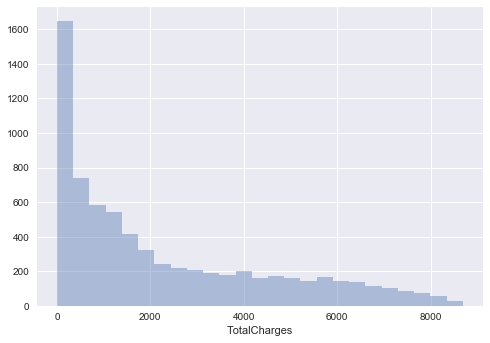

In [22]:
import seaborn as sns
sns.distplot(df['TotalCharges'], kde=False)

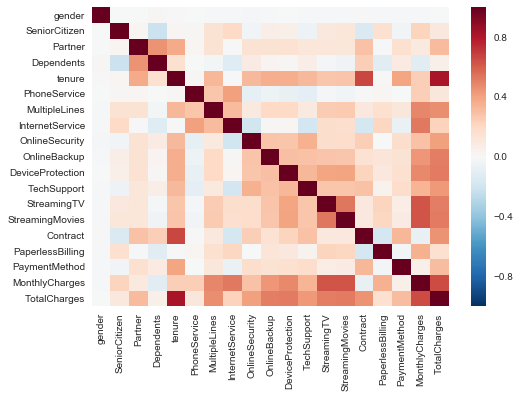

In [23]:
corr = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
           'PhoneService','MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod', 'MonthlyCharges', 'TotalCharges']].corr()

sns.heatmap(corr)

In [24]:
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.009912,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.012362,-0.014569,-0.000080
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.202513,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.033520,0.220173,0.103006
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000631,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.160475,0.096848,0.317504
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.121616,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.093439,-0.113890,0.062078
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.003959,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.396626,0.247900,0.826178
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.407817,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.000104,0.247398,0.113214
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.314431,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.112872,0.490434,0.468504
InternetService,-0.009912,0.202513,0.000631,-0.121616,0.003959,0.407817,0.314431,1.000000,-0.190741,0.008218,0.020342,-0.180585,0.177005,0.168292,-0.173253,0.218455,-0.068626,0.530465,0.232337
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.190741,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.175469,0.296594,0.411651
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.008218,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.147965,0.441780,0.509226


# Build and Compare different models:

In [25]:
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

/Users/yuhaowang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross validation attempts to avoid overfitting.<br />
StandardScaler can help me normalize each feature

In [26]:
X = df.as_matrix().astype(np.float)

scaler = StandardScaler()
X = scaler.fit_transform(X)
"Feature space holds %d observations and %d features" % X.shape

'Feature space holds 7043 observations and 19 features'

In [27]:
#Write one helper function to calculate the accuracy rate value
def run_cv(X,y,clf_class,**kwargs):
    
    kf = KFold(len(y),n_folds=10,shuffle=True, random_state=2)
    y_pred = y.copy()
    
    
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.metrics import average_precision_score


def accuracy(y_true,y_pred):
    
    return np.mean(y_true == y_pred)

print "Logistic Regression:"
print "%.3f" % accuracy(target, run_cv(X,target,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(target, run_cv(X,target,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(target, run_cv(X,target,SVC))
print "Random forest:"
print "%.3f" % accuracy(target, run_cv(X,target,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(target, run_cv(X,target,KNN))
print "Decision Tree:"
print "%.3f" % accuracy(target, run_cv(X,target,DTR))
print "GaussianNB:"
print "%.3f" % accuracy(target, run_cv(X,target,GNB))
print "QuadraticDiscriminantAnalysis:"
print "%.3f" % accuracy(target, run_cv(X,target,QDA))
print "BaggingClassifier:"
print "%.3f" % accuracy(target, run_cv(X,target,BC))
print "AdaBoostClassifier:"
print "%.3f" % accuracy(target, run_cv(X,target,ABC))


Logistic Regression:
0.802
Gradient Boosting Classifier
0.802
Support vector machines:
0.801
Random forest:
0.781
K-nearest-neighbors:
0.764
Decision Tree:
0.725
GaussianNB:
0.747
QuadraticDiscriminantAnalysis:
0.760
BaggingClassifier:
0.781
AdaBoostClassifier:
0.801


As we can see from that outcomes, "Logistic Regression", "Gradient Boosting Classifier", "Support vector machines" and "AdaBoostClassifier" got better scores than other classifiers

## Draw a confusion matrix

[[4731  443]
 [ 956  913]]


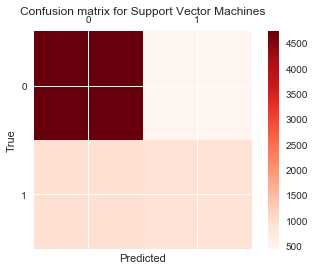

[[4651  523]
 [1033  836]]


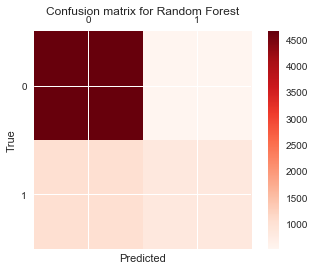

[[4426  748]
 [ 916  953]]


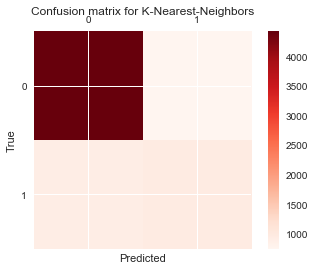

[[4687  487]
 [ 906  963]]


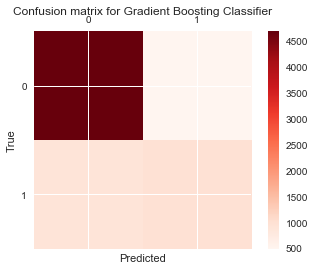

[[4628  546]
 [ 852 1017]]


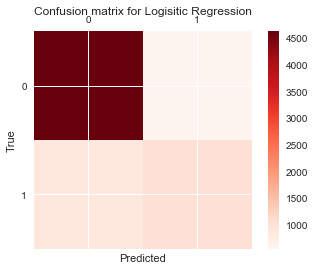

[[4659  515]
 [ 888  981]]


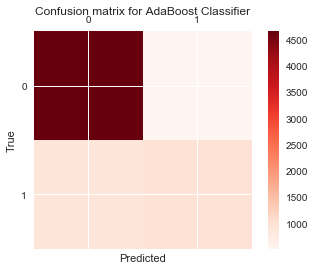

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(target)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
    ( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
    ( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) ),
    ( "AdaBoost Classifier", confusion_matrix(y,run_cv(X,y,ABC)))
]


%matplotlib inline

draw_confusion_matrices(confusion_matrices,class_names)

Precision rate has a direct relation with the profit. The higher precision rate, the higher profit. From the confusion matrix,we can see that:<br />
<b>Compared to other models, "Support Vector Machine" get the highest precision rate, 68%. When we check whether the user is churn, we can assure there are 2 people who have the real intention to leave among 3 people.</b>

# ROC Plot

Support vector machines:


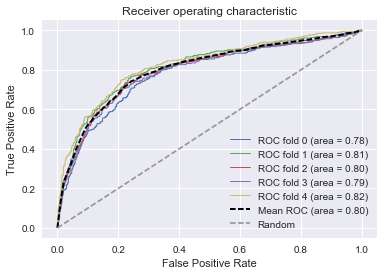

Logisitic Regression:


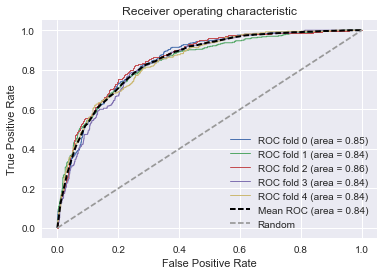

Gradient Boosting Classifier:


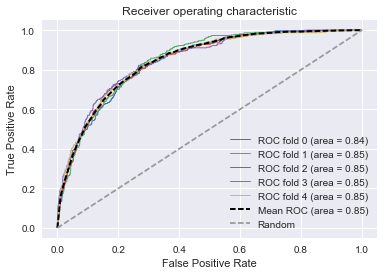

AdaBoost Classifier:


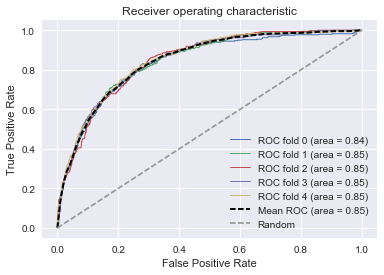

Random forests:


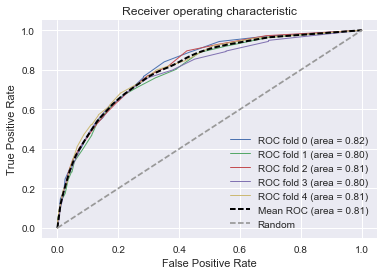

K-nearest-neighbors:


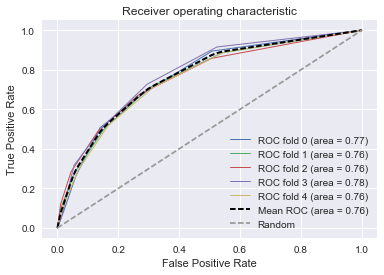

In [30]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_roc(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
      

print "Support vector machines:"
plot_roc(X,y,SVC,probability=True)

print "Logisitic Regression:"
plot_roc(X,y,LR)

print "Gradient Boosting Classifier:"
plot_roc(X,y,GBC)

print "AdaBoost Classifier:"
plot_roc(X,y,ABC)

print "Random forests:"
plot_roc(X,y,RF,n_estimators=18)

print "K-nearest-neighbors:"
plot_roc(X,y,KNN)

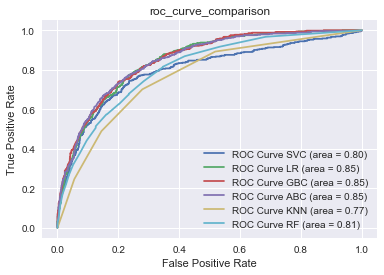

In [31]:
train_index,test_index = train_test_split(df.index)

svc = SVC(probability=True).fit(X[train_index], y[train_index])
lr = LR().fit(X[train_index], y[train_index])
gbc = GBC().fit(X[train_index], y[train_index])
abc = ABC().fit(X[train_index], y[train_index])
knn = KNN().fit(X[train_index], y[train_index])
rf = RF(n_estimators=18).fit(X[train_index], y[train_index])


fpr_svc, tpr_svc, thresholds_svc = roc_curve(y[test_index], svc.predict_proba(X[test_index])[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y[test_index], lr.predict_proba(X[test_index])[:, 1])
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y[test_index], gbc.predict_proba(X[test_index])[:, 1])
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y[test_index], abc.predict_proba(X[test_index])[:, 1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y[test_index], knn.predict_proba(X[test_index])[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y[test_index], rf.predict_proba(X[test_index])[:, 1])

plt.plot(fpr_svc, tpr_svc, label="ROC Curve SVC (area = %0.2f)" % auc(fpr_svc, tpr_svc))
plt.plot(fpr_lr, tpr_lr, label="ROC Curve LR (area = %0.2f)" % auc(fpr_lr, tpr_lr))
plt.plot(fpr_gbc, tpr_gbc, label="ROC Curve GBC (area = %0.2f)" % auc(fpr_gbc, tpr_gbc))
plt.plot(fpr_abc, tpr_abc, label="ROC Curve ABC (area = %0.2f)" % auc(fpr_abc, tpr_abc))
plt.plot(fpr_knn, tpr_knn, label="ROC Curve KNN (area = %0.2f)" % auc(fpr_knn, tpr_knn))
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF (area = %0.2f)" % auc(fpr_rf, tpr_rf))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("roc_curve_comparison");

plt.legend(loc=4)

The ROC Curve inspired me a lot. Cleary, classifiers should perform better than that.

# Important Features
In this section, I will use a tree algorithm(Random Forests) to find some important features that caused customer churn.

Feature ranking:
1. gender (0.169110)
2. SeniorCitizen (0.042239)
3. Partner (0.029888)
4. Dependents (0.024998)
5. tenure (0.022477)
6. PhoneService (0.022177)
7. MultipleLines (0.022147)
8. InternetService (0.019947)
9. OnlineSecurity (0.018749)
10. OnlineBackup (0.007485)


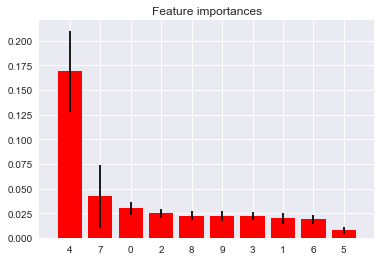

In [32]:
train_index,test_index = train_test_split(df.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = df.columns

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

As we can see from the graph, the top 5 features that caused customer churn are more traditional. Gender, age(senior citizen),partner, dependents and tenure have more positive impact on customer. Unlike the previous assumption that the fancy service would influence more than people's personal situation.

# Calibration analysis
Compare the predict outcome and real condition to evaluate different models.

In [33]:
def calibration(prob,outcome,n_bins=10):
    prob = np.array(prob)
    outcome = np.array(outcome)
    helper = 0.0
    
    judgement_bins = np.arange(n_bins + 1) / n_bins
    bin_num = np.digitize(prob,judgement_bins)
    for j_bin in np.unique(bin_num):
        in_bin = bin_num == j_bin
        predicted_prob = np.mean(prob[in_bin])
        true_bin_prob = np.mean(outcome[in_bin])
        helper += np.sum(in_bin) * ((predicted_prob - true_bin_prob) ** 2)
    return helper / len(prob)

def cal_prob(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=10, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

def print_measurements(pred_prob):
    churn_prob, is_churn = pred_prob[:,1], y == 1
    print "  %-20s %.4f" % ("Calibration Error: ", calibration(churn_prob, is_churn))
    

In [34]:
print "Support vector machines:"
print_measurements(cal_prob(X,y,SVC,probability=True))

print "Random forests:"
print_measurements(cal_prob(X,y,RF,n_estimators=18))

print "K-nearest-neighbors:"
print_measurements(cal_prob(X,y,KNN))

print "Gradient Boosting Classifier:"
print_measurements(cal_prob(X,y,GBC))

print "Logisitic Regression:"
print_measurements(cal_prob(X,y,LR))

print "AdaBoost Classifier:"
print_measurements(cal_prob(X,y,ABC))

print "Alert: Lower calibration is better."

Support vector machines:
  Calibration Error:   0.0020
Random forests:
  Calibration Error:   0.0036
K-nearest-neighbors:
  Calibration Error:   0.0099
Gradient Boosting Classifier:
  Calibration Error:   0.0001
Logisitic Regression:
  Calibration Error:   0.0004
AdaBoost Classifier:
  Calibration Error:   0.0908
Alert: Lower calibration is better.


## Deep learning

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 25, epochs = 300)

Using TensorFlow backend.


Epoch 1/300
5634/5634 [==============================] - 0s - loss: 0.5861 - acc: 0.7327      
Epoch 2/300
5634/5634 [==============================] - 0s - loss: 0.4481 - acc: 0.7336     

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[932, 109],
       [201, 167]])

## Answer:
### Service can help company keep customers, however, the personal situation can make a bigger difference than service

# Colusion:
## From this analysis, I found some interesting things:
<ul>
<li>Pay more attention on these areas including gender, age(senior citizen),partner, dependents and tenure. </li>
<li>Such services like PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup can influence people more than others</li>

</ul>